# Assessment of wildfire season in California 

In order to explore changes in California’s wildfire season, we will analyze the change over time in the AQI index when PM2.5 is the defining parameter in California counties. We will plot this data from 1980-2020 to visualize any changes that have occurred. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import datetime

In [3]:
# load in complete csv file 
aqi_all=pd.read_csv('aqi_df.csv')
# aqi_all

/Users/feliciacruz/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [59]:
# format date as datetime
aqi_all['Date']=pd.to_datetime(aqi_all['Date'], format = '%Y-%m-%d')

# make a year column 
aqi_all['Year'] = pd.DatetimeIndex(aqi_all['Date']).year

# get category column as a factor
aqi_all["Category"] = aqi_all.Category.astype('category')
aqi_ca_pm.dtypes

aqi_all_dtypes=aqi_all.dtypes
print(aqi_all_dtypes)

Unnamed: 0                            int64
State Name                           object
county Name                          object
State Code                           object
County Code                           int64
Date                         datetime64[ns]
AQI                                   int64
Category                           category
Defining Parameter                   object
Defining Site                        object
Number of Sites Reporting             int64
Year                                  int64
dtype: object


In [60]:
aqi_all["Year"].unique()
aqi_all

,Unnamed: 0,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Year
0,0,Alabama,DeKalb,1,49,2021-01-01,30,Good,Ozone,01-049-9991,1,2021
1,1,Alabama,DeKalb,1,49,2021-01-02,27,Good,Ozone,01-049-9991,1,2021
2,2,Alabama,DeKalb,1,49,2021-01-03,34,Good,Ozone,01-049-9991,1,2021
3,3,Alabama,DeKalb,1,49,2021-01-04,36,Good,Ozone,01-049-9991,1,2021
4,4,Alabama,DeKalb,1,49,2021-01-05,31,Good,Ozone,01-049-9991,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
8048537,8048537,Louisiana,St. Charles,22,89,1995-09-27,54,Moderate,Ozone,22-089-0003,1,1995
8048538,8048538,Louisiana,St. Charles,22,89,1995-09-28,97,Moderate,Ozone,22-089-0003,1,1995
8048539,8048539,Louisiana,St. Charles,22,89,1995-09-29,42,Good,Ozone,22-089-0003,1,1995
8048540,8048540,Louisiana,St. Charles,22,89,1995-09-30,30,Good,Ozone,22-089-0003,3,1995


## Tasks 
- filter for just CA 
- filter for just PM 2.5 days ? (or also PM 10?)
- exploratory plot of all PM days? subset? 
- how to deal with super high AQI values??
- need to make category a factor 

In [61]:
aqi_ca = aqi_all[aqi_all["State Name"] == "California"]
# aqi_ca["State Name"].unique()
aqi_ca

,Unnamed: 0,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Year
2019,2019,California,Colusa,6,11,2021-01-16,10,Good,PM2.5,06-011-0007,1,2021
2020,2020,California,Colusa,6,11,2021-01-17,0,Good,PM2.5,06-011-0007,1,2021
2021,2021,California,Colusa,6,11,2021-01-18,0,Good,PM2.5,06-011-0007,1,2021
2022,2022,California,Colusa,6,11,2021-01-19,7,Good,PM2.5,06-011-0007,1,2021
2023,2023,California,Colusa,6,11,2021-01-20,32,Good,PM2.5,06-011-0007,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
7980030,7980030,California,Yolo,06,113,1995-12-27,14,Good,Ozone,06-113-0004,2,1995
7980031,7980031,California,Yolo,06,113,1995-12-28,19,Good,Ozone,06-113-0004,2,1995
7980032,7980032,California,Yolo,06,113,1995-12-29,34,Good,PM10,06-113-2001,3,1995
7980033,7980033,California,Yolo,06,113,1995-12-30,13,Good,Ozone,06-113-0005,2,1995


In [62]:
aqi_ca["Defining Parameter"].unique()

array(['PM2.5', 'Ozone', 'PM10', 'CO', 'NO2', 'SO2'], dtype=object)

In [63]:
aqi_ca_pm = aqi_ca[aqi_ca["Defining Parameter"].str.startswith('PM2.5')]
#aqi_ca_pm["Defining Parameter"].unique()

# get category column as a factor
aqi_ca_pm["Category"] = aqi_ca_pm.Category.astype('category')
aqi_ca_pm.dtypes


<ipython-input-63-a6f5e081d678>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_ca_pm["Category"] = aqi_ca_pm.Category.astype('category')


Unnamed: 0                            int64
State Name                           object
county Name                          object
State Code                           object
County Code                           int64
Date                         datetime64[ns]
AQI                                   int64
Category                           category
Defining Parameter                   object
Defining Site                        object
Number of Sites Reporting             int64
Year                                  int64
dtype: object

Text(0, 0.5, 'AQI')

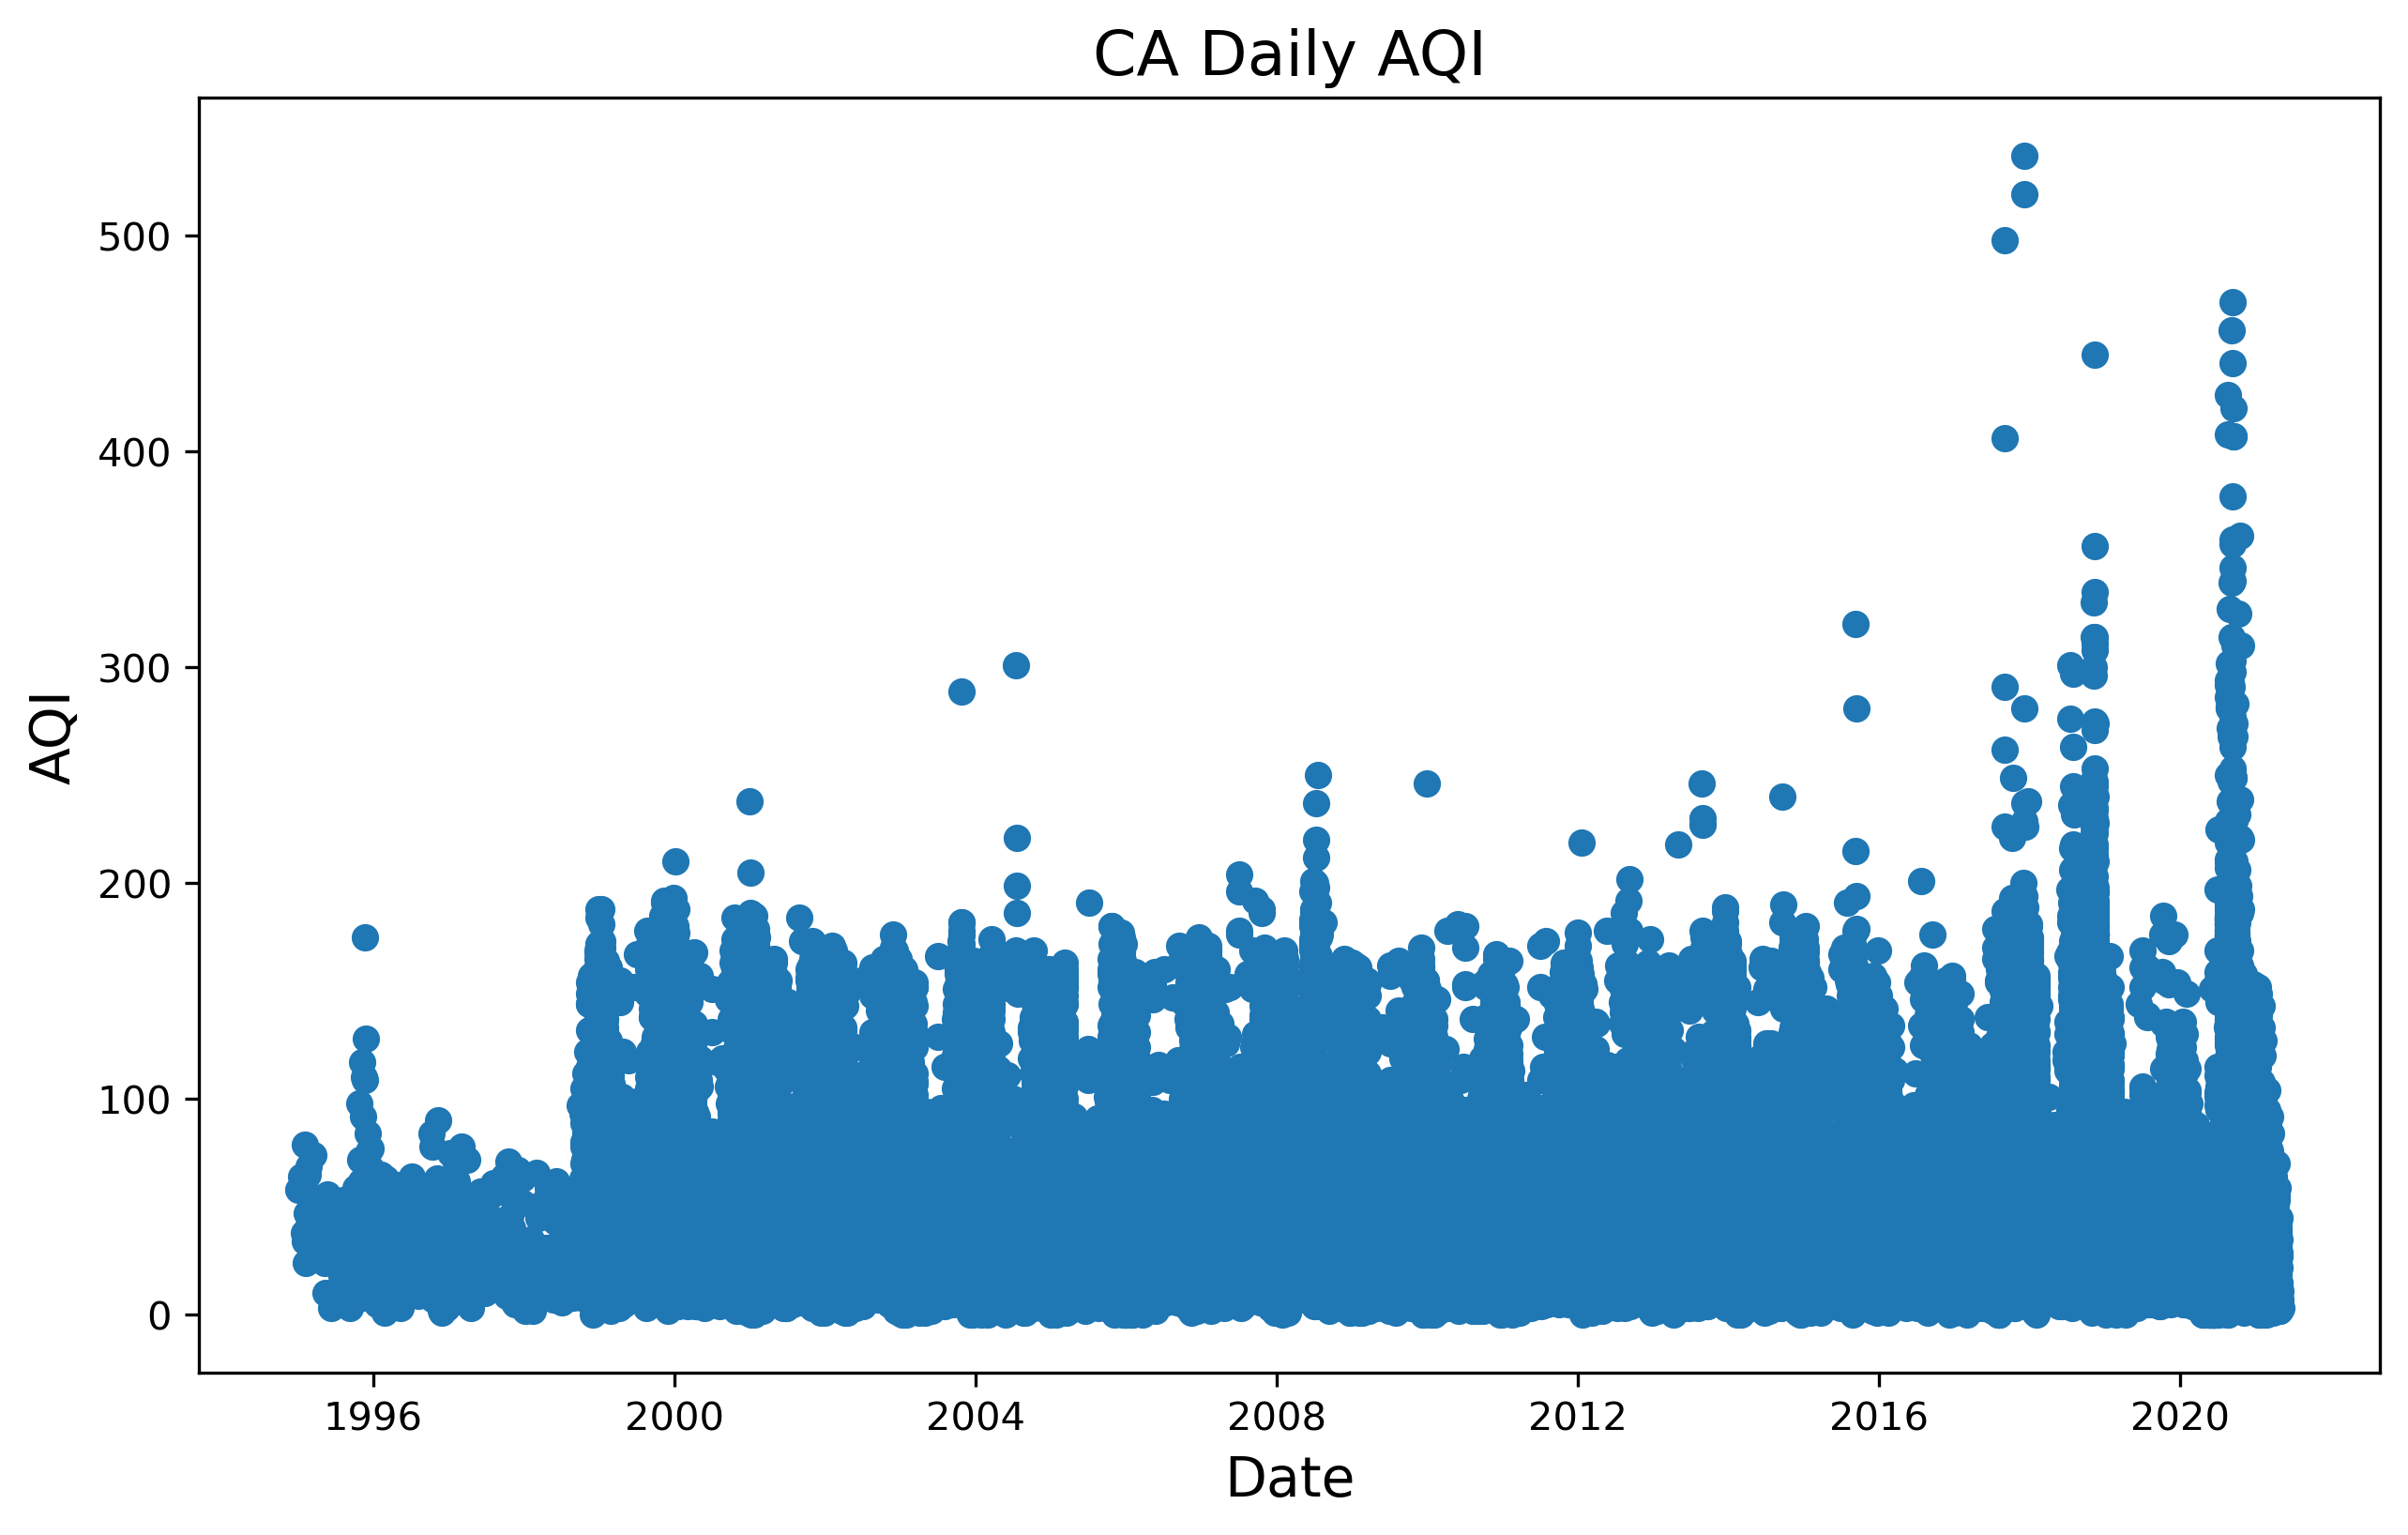

In [64]:
# practice plot

plt.figure(figsize=(10, 6), dpi=300)    # create a new figure, set size and resolution (dpi)
plt.scatter(aqi_ca_pm['Date'], aqi_ca_pm['AQI'])  # add data to the plot

#plt.legend(scatterpoints=1, handles='County Code', frameon=False, labelspacing=1, title='County Code')

plt.title('CA Daily AQI', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('AQI', fontsize=14)
#plt.xlim([np.datetime64('2020-01-01'), np.datetime64('2020-12-31')])
#plt.ylim(0,500)


### group by year and take average of all aqi readings 

In [65]:
aqi_avg_by_year = aqi_ca_pm.groupby('Year').mean()
aqi_avg_by_year

,Unnamed: 0,County Code,AQI,Number of Sites Reporting
Year,,,,
1995,7.968336e+06,42.203704,44.342593,2.657407
1996,7.702974e+06,28.006369,31.337580,1.929936
1997,7.433257e+06,30.098592,32.542254,1.971831
1998,7.165929e+06,46.529412,62.612457,3.370242
1999,6.887251e+06,57.741199,77.323501,5.212655
2000,6.592056e+06,57.403181,72.346322,5.234990
2001,6.288638e+06,57.789302,69.609686,5.214673
2002,5.980873e+06,57.464906,74.964906,5.240792
2003,5.671555e+06,57.585526,65.518640,5.144006


In [67]:
aqi_year = aqi_ca_pm[["Year", "AQI"]]

year_mean = aqi_year.groupby('Year').mean()
year_mean = year_mean.reset_index()

year_mean.columns
#.groupby('Year').mean()

Year      int64
AQI     float64
dtype: object

(0.0, 90.0)

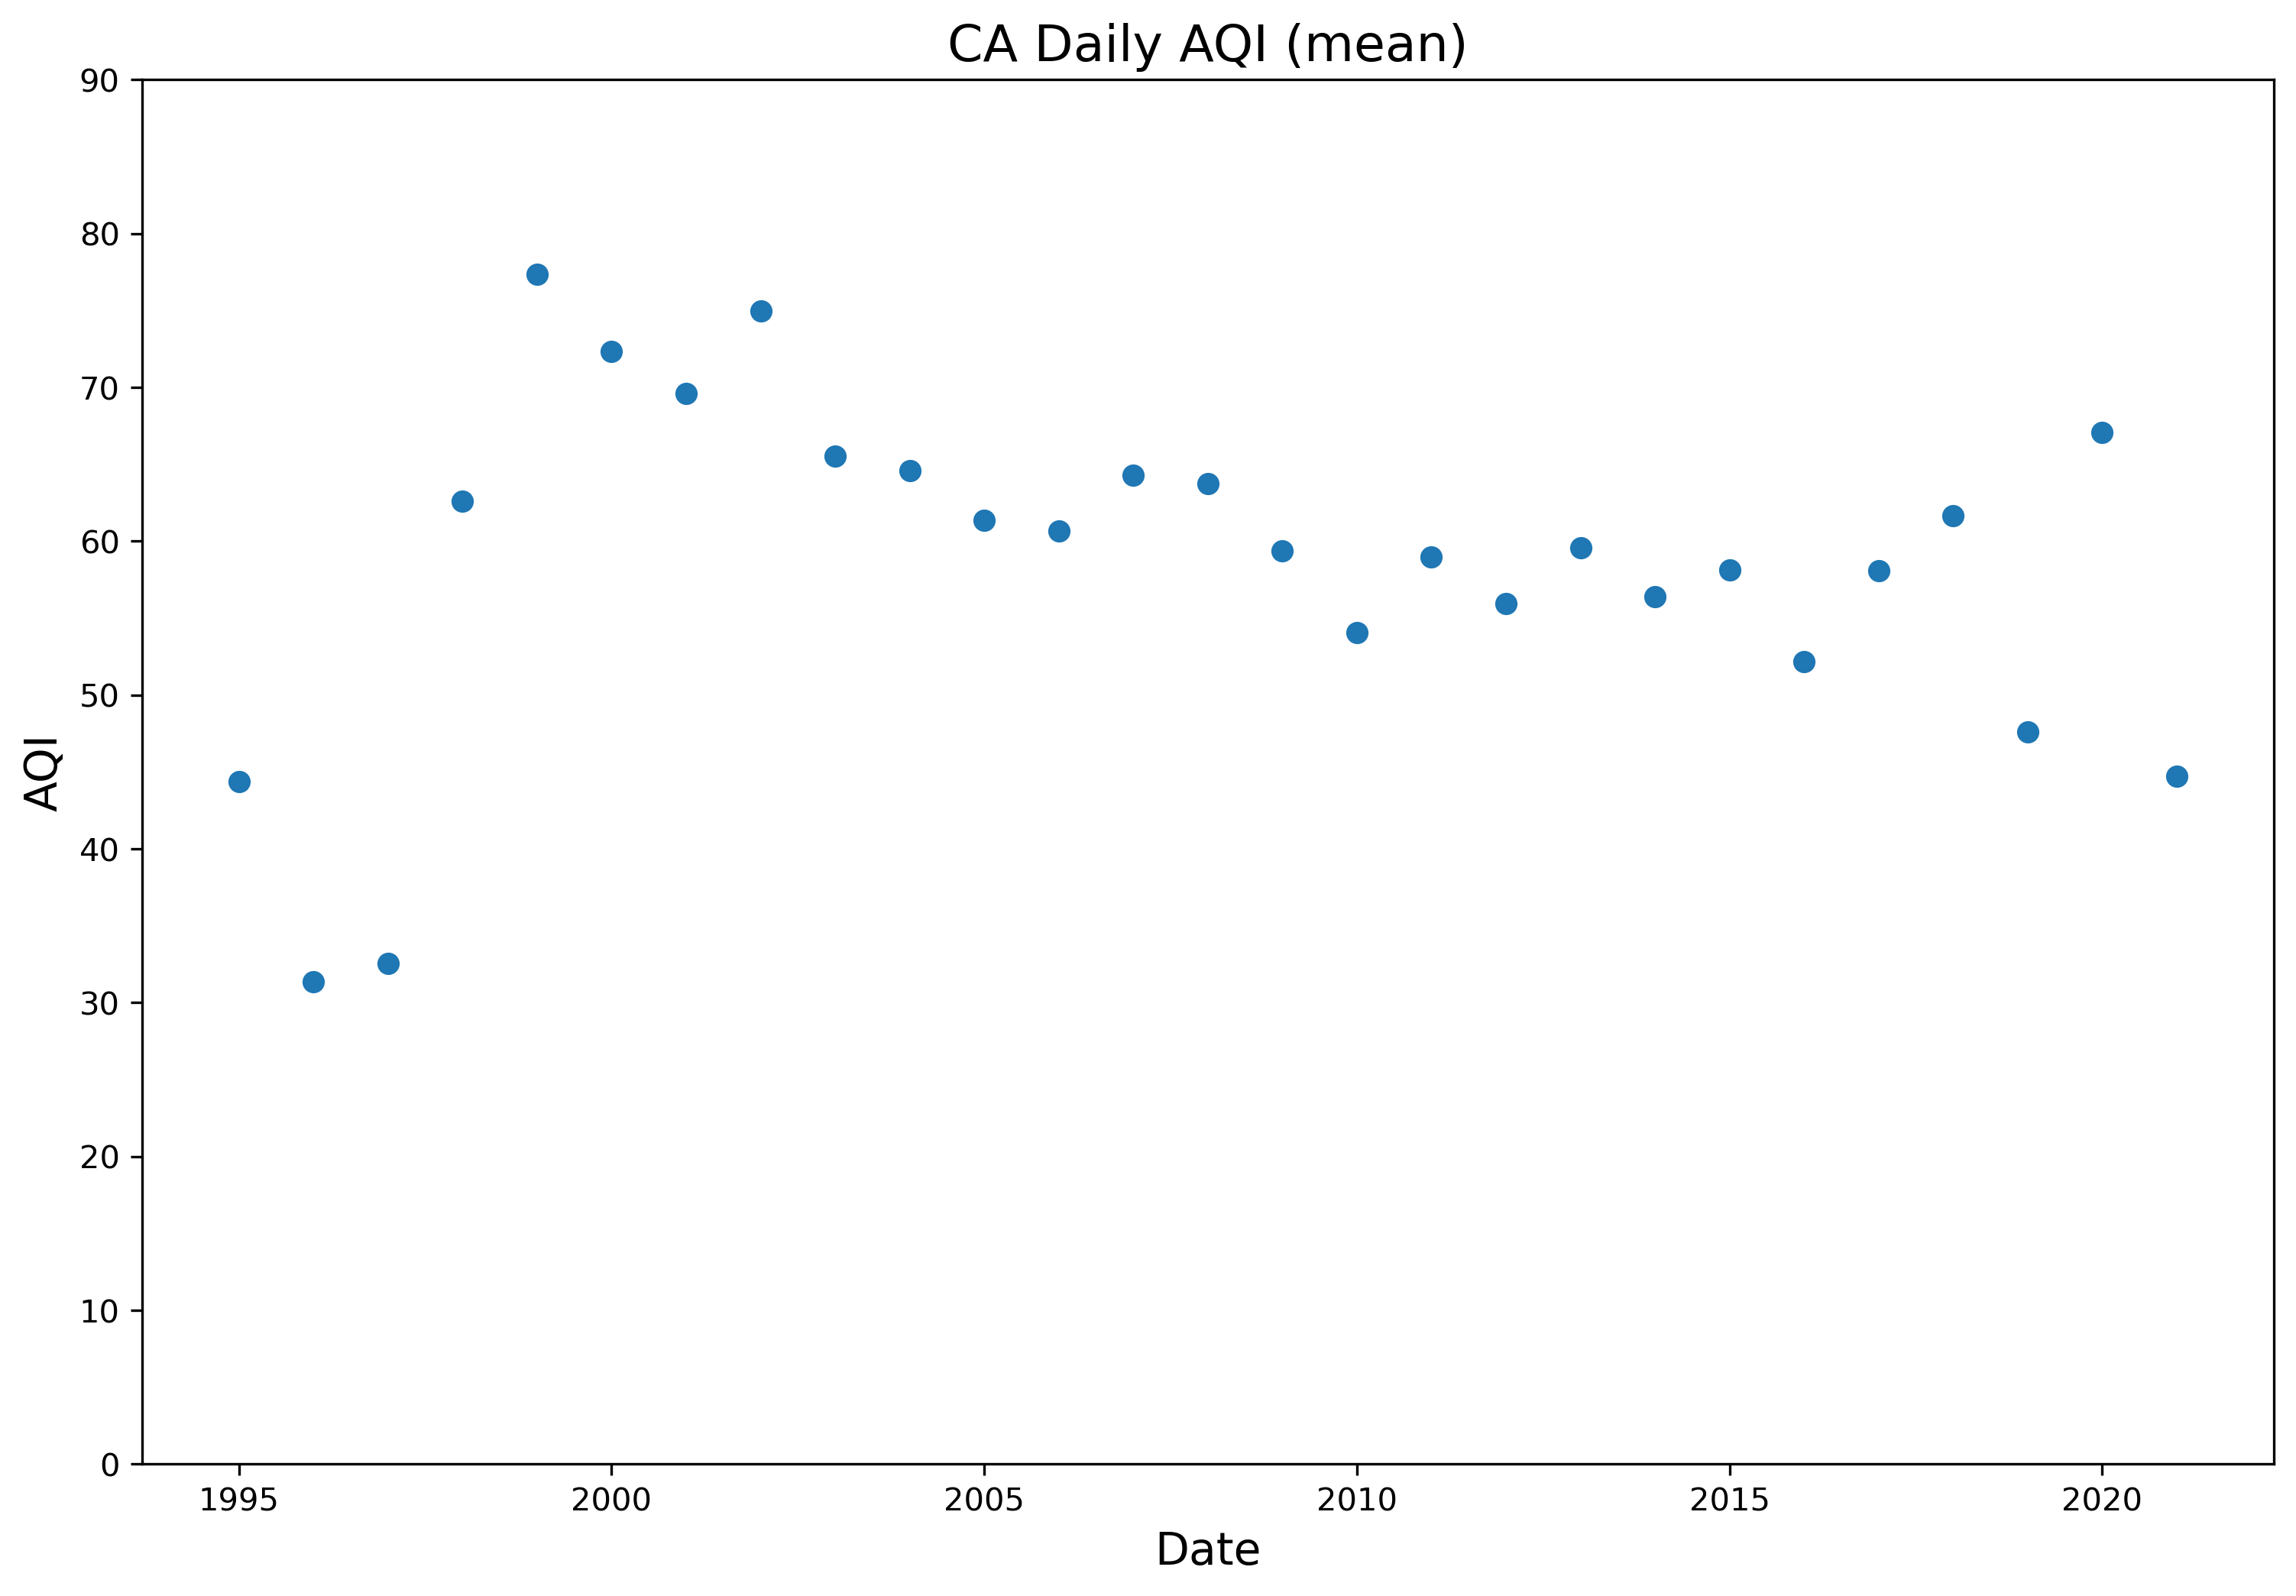

In [49]:
plt.figure(figsize=(12, 8), dpi=300)    # create a new figure, set size and resolution (dpi)
plt.scatter(year_mean['Year'], year_mean['AQI'])  # add data to the plot

#plt.legend(scatterpoints=1, handles='County Code', frameon=False, labelspacing=1, title='County Code')

plt.title('CA Daily AQI (mean)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('AQI', fontsize=14)
plt.ylim(0,90)

- this does not show much 
- higher average aqi around 2000
- could this be due to an inconsistent number of readings per year? 

### counting aqi values above a certain threshhold 

In [70]:
# subset for year, aqi, and category 
ca_sub = aqi_ca[["Date", "Year", "AQI", "Category"]]
ca_sub

,Date,Year,AQI,Category
2019,2021-01-16,2021,10,Good
2020,2021-01-17,2021,0,Good
2021,2021-01-18,2021,0,Good
2022,2021-01-19,2021,7,Good
2023,2021-01-20,2021,32,Good
...,...,...,...,...
7980030,1995-12-27,1995,14,Good
7980031,1995-12-28,1995,19,Good
7980032,1995-12-29,1995,34,Good
7980033,1995-12-30,1995,13,Good


In [72]:
# group by category 
year_category_mean = ca_sub.groupby(['Year', 'Category']).mean()
year_category_mean = year_category_mean.reset_index()

year_category_mean.columns

Index(['Year', 'Category', 'AQI'], dtype='object')

In [80]:
# filter for aqi above 150? (unhealthy and above)
ca_unhealthy = ca_sub[ca_sub["AQI"] > 150]
# ca_unhealthy["Category"].unique()

['Very Unhealthy', 'Unhealthy', 'Hazardous']
Categories (3, object): ['Very Unhealthy', 'Unhealthy', 'Hazardous']

(0.0, 500.0)

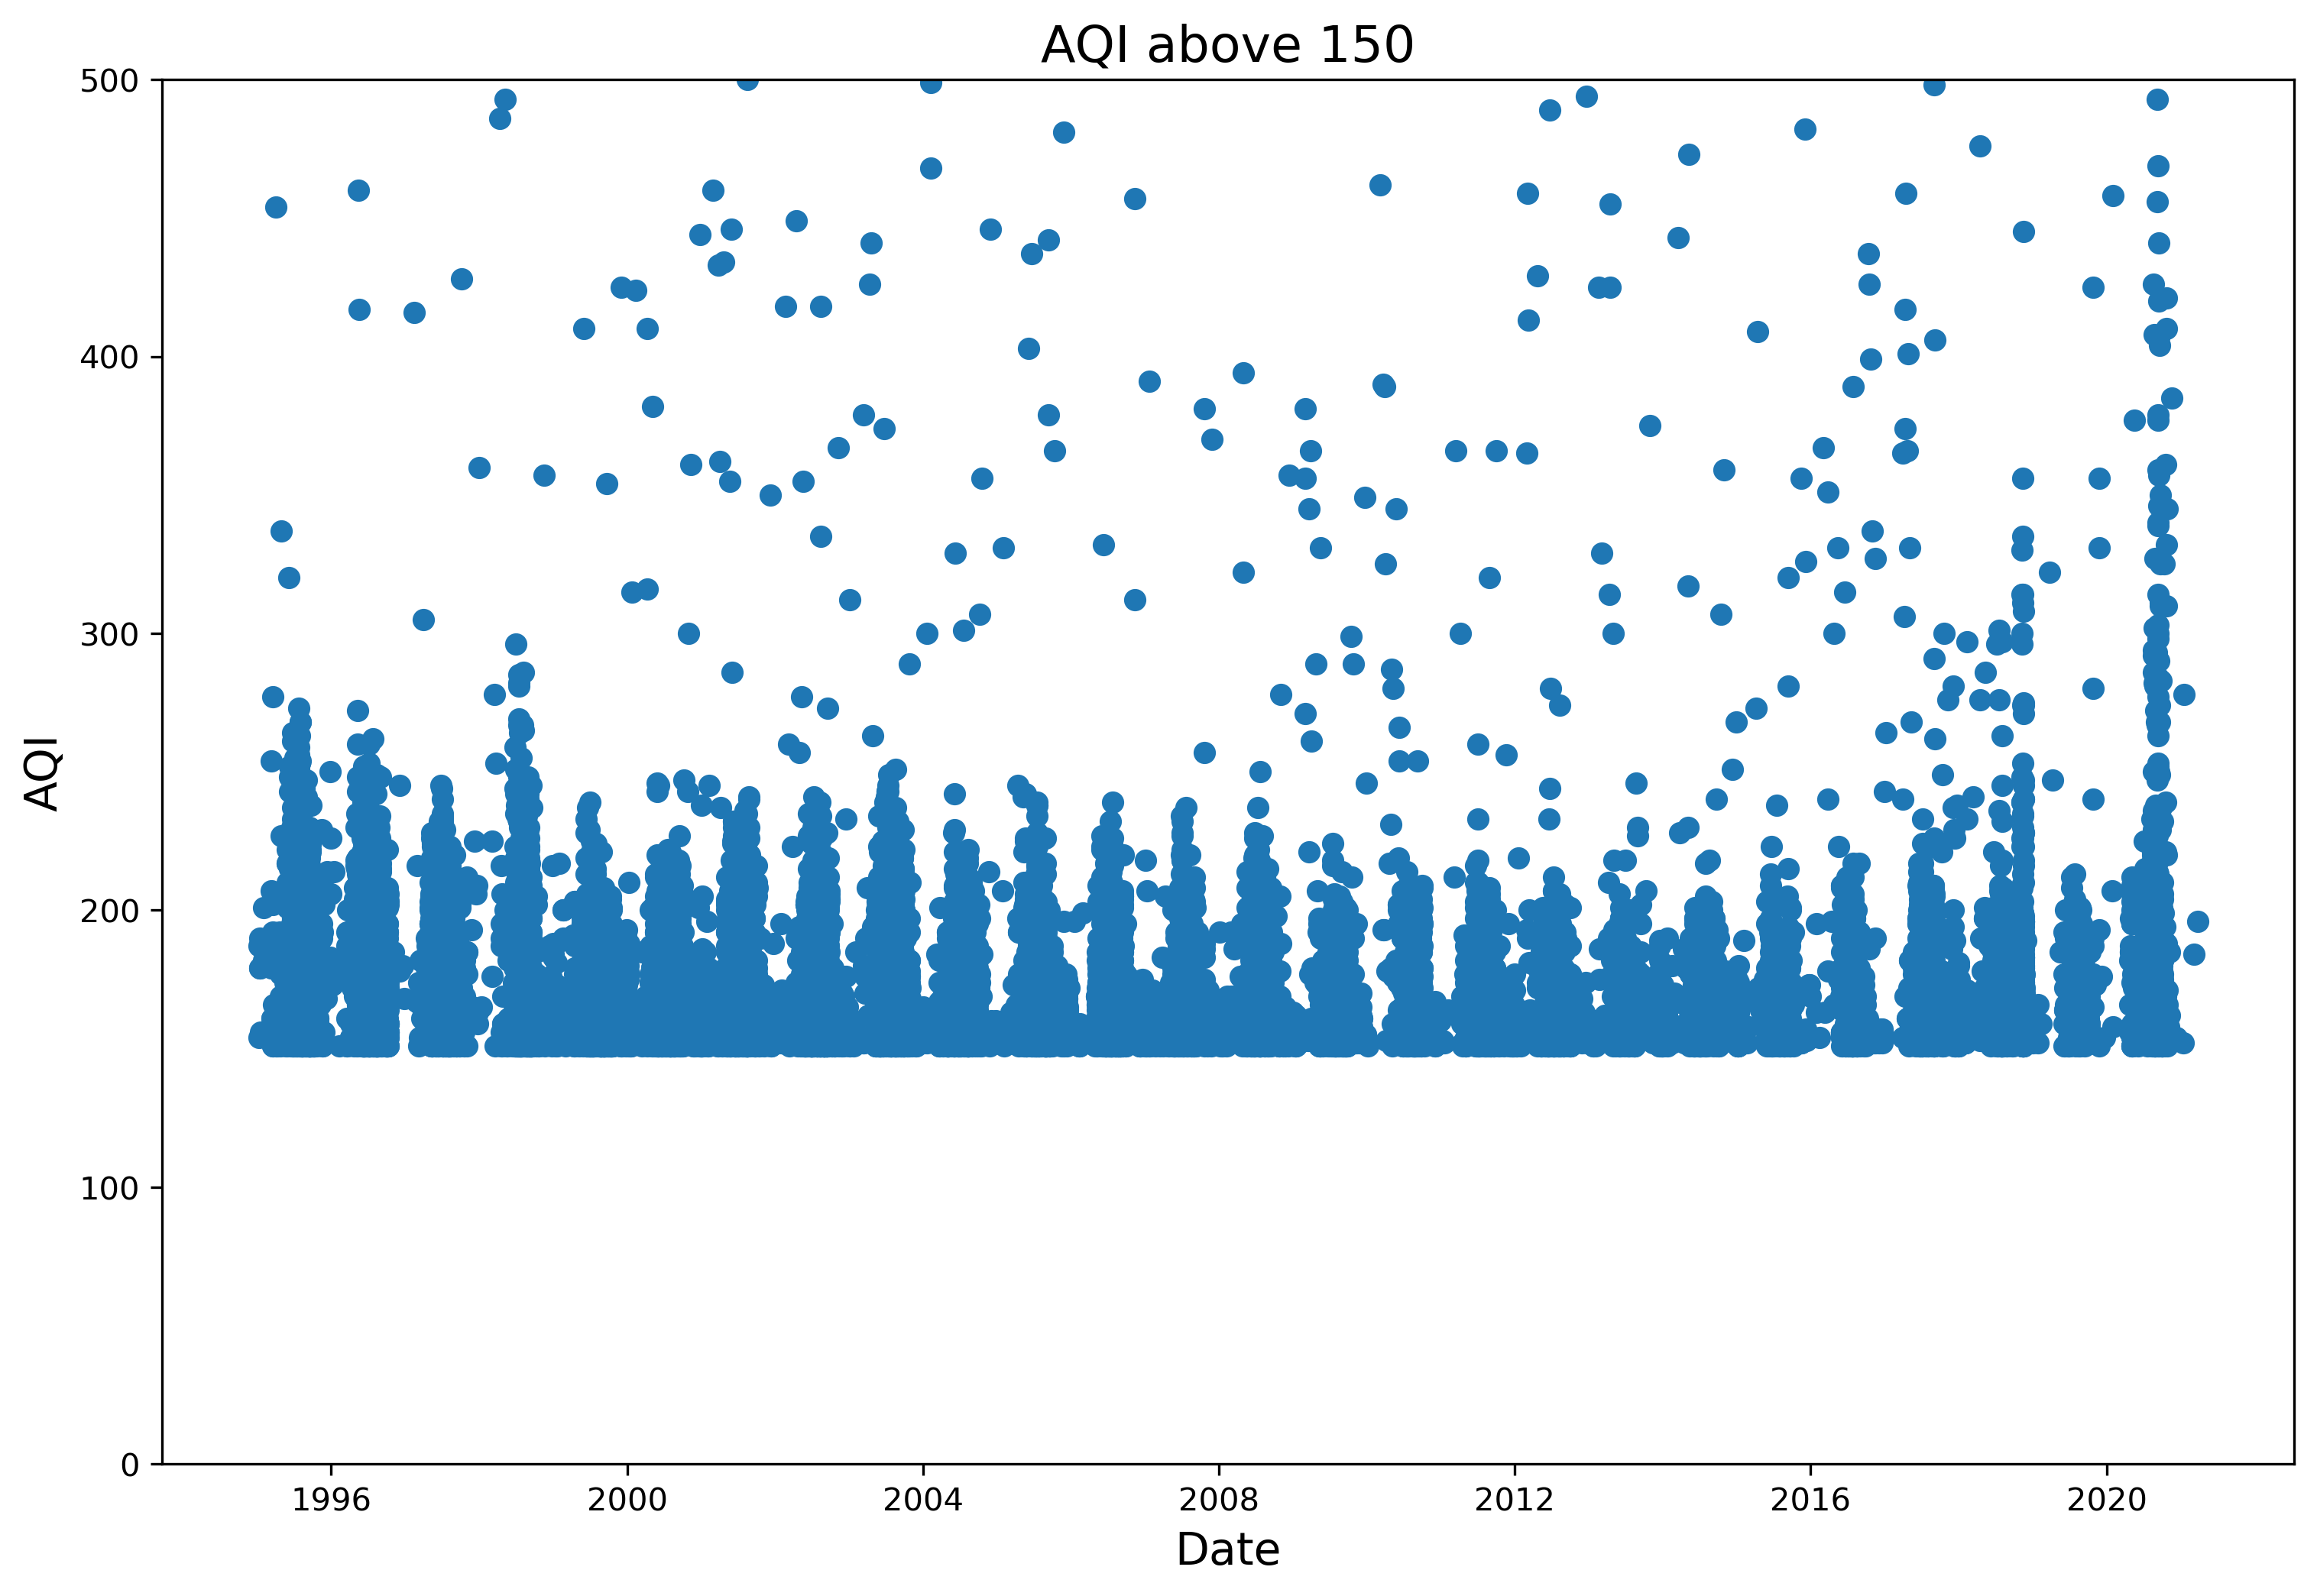

In [84]:
plt.figure(figsize=(12, 8), dpi=300)    # create a new figure, set size and resolution (dpi)
plt.scatter(ca_unhealthy['Date'], ca_unhealthy['AQI'])  # add data to the plot

#plt.legend(scatterpoints=1, handles='County Code', frameon=False, labelspacing=1, title='County Code')

plt.title('AQI above 150', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('AQI', fontsize=14)
# plt.ylim(0,500)